## BACKBLAZE Hard Drive Data and Stats

### Who is BACKBLAZE

>- In 2007 we began Backblaze to backup our friends' computers online. We had a mission to make backup software elegant and provide complete peace of mind. Today we have expanded to protect business and offer our B2 Cloud Storage to developers and IT.

### Analysis of BackBlaze hard drive data.

 Intro on [Backblaze data page](https://www.backblaze.com/b2/hard-drive-test-data.html)

> *Since 2013, Backblaze has published statistics and insights based on the hard drives in our data center. You'll find links to those reports below. We also publish the data underlying these reports, so that anyone can reproduce them. You'll find an overview of this data and the download links further down this page.*

### Overview of the Hard Drive Data

Each day in the Backblaze data center, we take a snapshot of each operational hard drive. This snapshot includes basic drive information along with the S.M.A.R.T. statistics reported by that drive. The daily snapshot of one drive is one record or row of data. All of the drive snapshots for a given day are collected into a file consisting of a row for each active hard drive. The format of this file is a "csv" (Comma Separated Values) file. Each day this file is named in the format YYYY-MM-DD.csv, for example, 2013-04-10.csv.

The first row of the each file contains the column names, the remaining rows are the actual data. The columns are as follows:

>- **Date** - The date of the file in yyyy-mm-dd format.
>- **Serial Number** - The manufacturer-assigned serial number of the drive.
>- **Model** - The manufacturer-assigned model number of the drive.
>- **Capacity** - The drive capacity in bytes.
>- **Failure** - Contains a "0" if the drive is OK. Contains a "1" if this is the last day the drive was operational before failing.
>- **2013-2014 SMART Stats** - 80 columns of data, that are the Raw and Normalized values for 40 different SMART stats as reported by the given drive. Each value is the number reported by the drive.
>- **2015 SMART Stats** - 90 columns of data, that are the Raw and Normalized values for 45 different SMART stats as reported by the given drive. Each value is the number reported by the drive.


### Helpful Hints and Caveats

##### The 2015 versus the 2013-14 Schema

For 2015 we began tracking 5 additional SMART attributes, meaning there are 10 additional fields in the 2015 schema. The new SMART attributes being collected for 2015 are the raw and normalized values for: smart_22, smart_220, smart_222, smart_224, and smart_226.

##### Blank Fields

The daily snapshots record the SMART stats information reported by the drive. Since most drives do not report values for all SMART stats, there are blank fields in every record. Also, different drives may report different stats based on their model and/or manufacturer.

##### Inconsistent Fields

Reported stats for the same SMART stat can vary in meaning based on the drive manufacturer and the drive model. Make sure you are comparing apples-to-apples as drive manufacturers don't generally disclose what their specific numbers mean.

##### Out-of-Bounds Values

The values in the files are the values reported by the drives. Sometimes, those values are out of whack. For example, in a few cases the RAW value of SMART 9 (Drive life in hours) reported a value that would make a drive 10+ years old, which was not possible. In other words, it's a good idea to have bounds check when you process the data.

##### The Number of Drives Will Change

When a drive fails, the "Failure" field is set to "1" on the day it fails. The next day, the drive is removed from the list and is no longer counted, reducing the overall number of drives. On the other hand, new drives are added on a regular basis increasing the overall number of drives. In other words, count the number of drives each day.

##### Computing Drive Days

Each day a drive is listed in a daily snapshot file it counts as one drive day. For example, if there are 35,000 drives listed in a daily snapshot file that equals 35,000 drive days. In the docs.zip file you'll find a PDF named "computing_failure_rates.pdf" which describes how we compute drive days, drive years, and drive failures rates.

##### Drive Age

As noted, the RAW value of SMART 9 is the number of hours a drive has been in service up to that point. To determine the drive's age in days, you divide the reported number by 24.

##### Missing Data

In Q1 2017, the SMART stats for some of the hard drives during the period of January 28 - 31, 2017 were not recorded. On February 1, 2017 complete reporting resumed. While this had no effect on the how we use the data, it may, depending on how you use the data, effect your efforts.


#### How You Can Use the Data

You can download and use this data for free for your own purpose, all we ask is three things

>1. you cite Backblaze as the source if you use the data,
>2. you accept that you are solely responsible for how you use the data, and
>3. you do not sell this data to anyone, it is free.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# The usual suspects ...
import numpy as np
import pandas as pd
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb
import pdvega

# Plotting settings
sns.set_style('whitegrid')
np.set_printoptions(precision=5, suppress=True)

We will read all the `csv` data files and concatanate them into a single variable. The hard drive data files for this analysis are for the 4th quarter of 2017 and provided by [Backblaze](https://www.backblaze.com/b2/hard-drive-test-data.html).

In [2]:
# Getting ALL the data
data = pd.concat([pd.read_csv(filename, nrows=1000, ) # set to 1000 rows for testing
                  for filename in 
                  gb.glob('data_Q4_2017/*.csv')])

Inspecting the dataset:

In [3]:
# List of columns
data.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized',
       'smart_22_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'smart_191_raw',
       'smart_1

In [4]:
# Size of data
data.shape

(92000, 95)

Data has over 8 million rows (8,266,213 data points) and 95 fields.

In [5]:
# Top 10 rows
data.head(10)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2017-11-10,Z305B2QN,ST4000DM000,4000787030016,0,116.0,115027136.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-10,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,101.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-10,ZA16NQJR,ST8000NM0055,8001563222016,0,82.0,143064072.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-10,ZA18CEBT,ST8000NM0055,8001563222016,0,79.0,72194448.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-10,ZA18CEBS,ST8000NM0055,8001563222016,0,71.0,11555824.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-11-10,PL1331LAHEYUGH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-10,ZA130TTW,ST8000DM002,8001563222016,0,78.0,58678168.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-11-10,ZA18CEBF,ST8000NM0055,8001563222016,0,80.0,99613544.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-11-10,PL2331LAG9TEEJ,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,135.0,98.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-11-10,PL2331LAH3WYAJ,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,133.0,105.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Summary description
data.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,9.200000e+04,92000.000000,91996.000000,9.199600e+04,24534.000000,24534.000000,91996.000000,91996.000000,91996.00000,91996.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,182.0,182.0,0.0,0.0
mean,5.477379e+12,0.000054,100.689965,8.799117e+07,135.906905,96.659574,98.728032,146.741804,99.99912,8.600515,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN
std,2.419786e+12,0.007372,18.811286,8.117733e+07,19.538758,22.908603,12.699699,623.383986,0.02966,33.413645,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
min,-1.000000e+00,0.000000,64.000000,0.000000e+00,100.000000,0.000000,84.000000,0.000000,99.00000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN
25%,4.000787e+12,0.000000,83.000000,0.000000e+00,133.000000,100.000000,92.000000,0.000000,100.00000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN
50%,4.000787e+12,0.000000,100.000000,7.445921e+07,134.000000,102.000000,96.000000,0.000000,100.00000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN
75%,8.001563e+12,0.000000,115.000000,1.592933e+08,134.000000,104.000000,100.000000,0.000000,100.00000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN
max,1.200014e+13,1.000000,200.000000,2.441266e+08,252.000000,121.000000,210.000000,8925.000000,100.00000,1042.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN


In [7]:
# Changing the date to datetime format
pd.to_datetime(data['date'])

# Setting the date as the index
data = data.set_index('date')
#data.index.name = None
#data.shape

Dealing with 94 columns is cumbersome, we need to reduce them to a manageable number. We'll do this by setting a selection criterion and dropping the fields we don't need.

In [8]:
# Removing redundant data
def removeFields(data):
    '''
    To remove redundant columns, i.e., columns with single or no entries,
    or with more than 50% of the data missing from the dataset.
    '''
    
    # First, we identify the columns we want to remove.
    print('Initial shape of the dataset: {0}{1}'.format(data.shape, '\n'))
    _remove_cols = []
    for column in data.columns:
        # Check the number of unique items in each column.
        if (len(data[column].unique()) == 1):
            _remove_cols.append(column)
        # Check the number of missing values in each column.
        # In this case, if more than 50% the column has missing values, we want to drop it.
        elif (data[column].isnull().sum() >= ((data.shape[0])/2)):
            _remove_cols.append(column)
        
    # Columns to be removed.
    if (len(_remove_cols) > 0):
        for column in _remove_cols:
            print('The following will be removed: {0}{1}'.format(column, '\n'))
    else:
        print('Nothing to delete.\n')
            
    # We then proceed to remove the columns.
    _remove = (x for x in _remove_cols)
    try:
        while True:
            del data[_remove.__next__()]
    except StopIteration:
        print('Final shape of the dataset: {0}'.format(data.shape))
    except KeyError:
        print('Nothing to do.\n')
        
    return data.head()

# Dropping columns we don't need
removeFields(data)

Initial shape of the dataset: (92000, 94)

The following will be removed: smart_2_normalized

The following will be removed: smart_2_raw

The following will be removed: smart_8_normalized

The following will be removed: smart_8_raw

The following will be removed: smart_11_normalized

The following will be removed: smart_11_raw

The following will be removed: smart_13_normalized

The following will be removed: smart_13_raw

The following will be removed: smart_15_normalized

The following will be removed: smart_15_raw

The following will be removed: smart_22_normalized

The following will be removed: smart_22_raw

The following will be removed: smart_183_normalized

The following will be removed: smart_183_raw

The following will be removed: smart_195_normalized

The following will be removed: smart_195_raw

The following will be removed: smart_196_normalized

The following will be removed: smart_196_raw

The following will be removed: smart_200_normalized

The following will be removed

,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,Z305B2QN,ST4000DM000,4000787030016,0,116.0,115027136.0,91.0,0.0,100.0,10.0,...,100.0,0.0,200.0,0.0,100.0,16448.0,100.0,3.832791e+10,100.0,4.555295e+10
2017-11-10,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,8.0,...,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,ZA16NQJR,ST8000NM0055,8001563222016,0,82.0,143064072.0,94.0,0.0,100.0,5.0,...,100.0,0.0,200.0,0.0,100.0,4643.0,100.0,2.893323e+10,100.0,3.884382e+10
2017-11-10,ZA18CEBT,ST8000NM0055,8001563222016,0,79.0,72194448.0,96.0,0.0,100.0,3.0,...,100.0,0.0,200.0,0.0,100.0,1618.0,100.0,1.990041e+10,100.0,1.959030e+10
2017-11-10,ZA18CEBS,ST8000NM0055,8001563222016,0,71.0,11555824.0,97.0,0.0,100.0,2.0,...,100.0,0.0,200.0,0.0,100.0,1614.0,100.0,2.001563e+10,100.0,1.993757e+10


At this point, we have read the data by stacking the datasets sets together. We have modified the dataset by removing the columns that have 80% or more of their data as `NaN` (missing data), as well as removing columns with one type of value (i.e., the same value through out the column).

Understanding the type of data we are dealing with, the context and scope of how it was collected and prepared will be vital for us to derive useful insights.

#### ATA S.M.A.R.T. Attributes

Each manufacturer defines a set of attributes, and sets threshold values beyond which attributes should not pass under normal operation. Each attribute has a: 

>- *raw value*, whose meaning is entirely up to the drive manufacturer (but often corresponds to counts or a physical unit, such as degrees Celsius (temperature) or second (time))
>- *normalized value*, which ranges from 1 to 253 (with 1 representing the worst and 253 representing the best)
>- *worst value*, which represents the lowest recorded normalized value

The initial default value of attributes is 100 but can vary between manufacturers. Manufacturers that have implemented at least one S.M.A.R.T. attribute in various products include 

>1. Samsung
>2. Seagate
>3. IBM (Hitachi)
>4. Fujitsu
>5. Maxtor
>6. Toshiba
>7. Intel
>8. sTec
>9. Inc.
>10. Western Digital
>11. ExcelStor Technology

#### Known ATA S.M.A.R.T. Attributes

Normalized values are usually mapped so that higher values are better (exceptions include `drive temperature`, `number of head load/unload cycles`), but higher *raw* attributes values may be better or wrose depending on the attribute and the manufacturer.

>- Smart 1: Raw_Read_Error_Rate (Raw Value)
>- Smart 1: Raw_Read_Error_Rate (Normalized Value)
>- Smart 2: Throughput_Performance (Raw Value)
>- Smart 2: Throughput_Performance (Normalized Value)
>- Smart 3: Spin_Up_Time (Raw Value)
>- Smart 3: Spin_Up_Time (Normalized Value)
>- Smart 4: Start_Stop_Count (Raw Value)
>- Smart 4: Start_Stop_Count (Normalized Value)
>- Smart 5: Reallocated_Sector_Ct (Raw Value)
>- Smart 5: Reallocated_Sector_Ct (Normalized Value)
>- Smart 7: Seek_Error_Rate (Raw Value)
>- Smart 7: Seek_Error_Rate (Normalized Value)
>- Smart 8: Seek_Time_Performance (Raw Value)
>- Smart 8: Seek_Time_Performance (Normalized Value)
>- Smart 9: Power_On_Hours (Raw Value)
>- Smart 9: Power_On_Hours (Normalized Value)
>- Smart 10: Spin_Retry_Count (Raw Value)
>- Smart 10: Spin_Retry_Count (Normalized Value)
>- Smart 11: Calibration_Retry_Count (Raw Value)
>- Smart 11: Calibration_Retry_Count (Normalized Value)
>- Smart 12: Power_Cycle_Count (Raw Value)
>- Smart 12: Power_Cycle_Count (Normalized Value)
>- Smart 183: Runtime_Bad_Block (Raw Value)
>- Smart 183: Runtime_Bad_Block (Normalized Value)
>- Smart 184: End-to-End_Error (Raw Value)
>- Smart 184: End-to-End_Error (Normalized Value)
>- Smart 187: Reported_Uncorrect (Raw Value)
>- Smart 187: Reported_Uncorrect (Normalized Value)
>- Smart 188: Command_Timeout (Raw Value)
>- Smart 188: Command_Timeout (Normalized Value)
>- Smart 189: High_Fly_Writes (Raw Value)
>- Smart 189: High_Fly_Writes (Normalized Value)
>- Smart 190: Airflow_Temperature_Cel (Raw Value)
>- Smart 190: Airflow_Temperature_Cel (Normalized Value)
>- Smart 191: G-Sense_Error_Rate (Raw Value)
>- Smart 191: G-Sense_Error_Rate (Normalized Value)
>- Smart 192: Power-Off_Retract_Count (Raw Value)
>- Smart 192: Power-Off_Retract_Count (Normalized Value)
>- Smart 193: Load_Cycle_Count (Raw Value)
>- Smart 193: Load_Cycle_Count (Normalized Value)
>- Smart 194: Temperature_Celsius (Raw Value)
>- Smart 194: Temperature_Celsius (Normalized Value)
>- Smart 195: Hardware_ECC_Recovered (Raw Value)
>- Smart 195: Hardware_ECC_Recovered (Normalized Value)
>- Smart 196: Reallocated_Event_Count (Raw Value)
>- Smart 196: Reallocated_Event_Count (Normalized Value)
>- Smart 197: Current_Pending_Sector (Raw Value)
>- Smart 197: Current_Pending_Sector (Normalized Value)
>- Smart 198: Offline_Uncorrectable (Raw Value)
>- Smart 198: Offline_Uncorrectable (Normalized Value)
>- Smart 199: UDMA_CRC_Error_Count (Raw Value)
>- Smart 199: UDMA_CRC_Error_Count (Normalized Value)
>- Smart 200: Multi_Zone_Error_Rate (Raw Value)
>- Smart 200: Multi_Zone_Error_Rate (Normalized Value)
>- Smart 240: Head_Flying_Hours (Raw Value)
>- Smart 240: Head_Flying_Hours (Normalized Value)
>- Smart 241: Total_LBAs_Written (Raw Value)
>- Smart 241: Total_LBAs_Written (Normalized Value)
>- Smart 242: Total_LBAs_Read (Raw Value)
>- Smart 242: Total_LBAs_Read (Normalized Value)

**NB:** Drives do not support all attribute codes. Some codes are specific to particular drive types (magnetic platter, flash, SSD). Drives may use different codes for the same parameter, e.g., codes 193 and 225.

**Threshold Exceeds Condition (TEC)** is an estimated date when a critical drive statistic will reach its threshold value. When Drive Health software reports a *"Nearest T.E.C."*, it should be regarded as a *"Failure date"*. Sometimes, no date is given and the drive can be expected to work without errors. To predict the date, the drive tracks the rate at which the attribute changes. Note that TEC dates are only estimates; hard drives can and do fail much sooner or much later than the TEC date.

[Backblaze](https://backblaze.com) from a blog post in 2014, has found that the following 5 SMART metrics indicate impending disk drive failure:

>- SMART 5 - Reallocated_Sector_Count
>- SMART 187 - Reported_Uncorrectable_Errors
>- SMART 188 - Command_Timeout
>- SMART 197 - Current_Pending_Sector_Count
>- SMART 198 - Offline_Uncorrectable

These 5 stats are based on [Backblaze's](https://backblaze.com) experience and input from others in the industry because they are consistent across manufacturers and they are good predictors of failure.

> Sources:
>- [S.M.A.R.T.](https://en.wikipedia.org/wiki/S.M.A.R.T.)
>- [SMART Attribute Details (Kingston Technology)](https://media.kingston.com/support/downloads/MKP_306_SMART_attribute.pdf)
>- [Failure Trends in a Large Disk Drive Population](https://static.googleusercontent.com/media/research.google.com/en//archive/disk_failures.pdf)
>- [Hard Drive SMART Stats](https://www.backblaze.com/blog/hard-drive-smart-stats/)

Dealing in missing data:

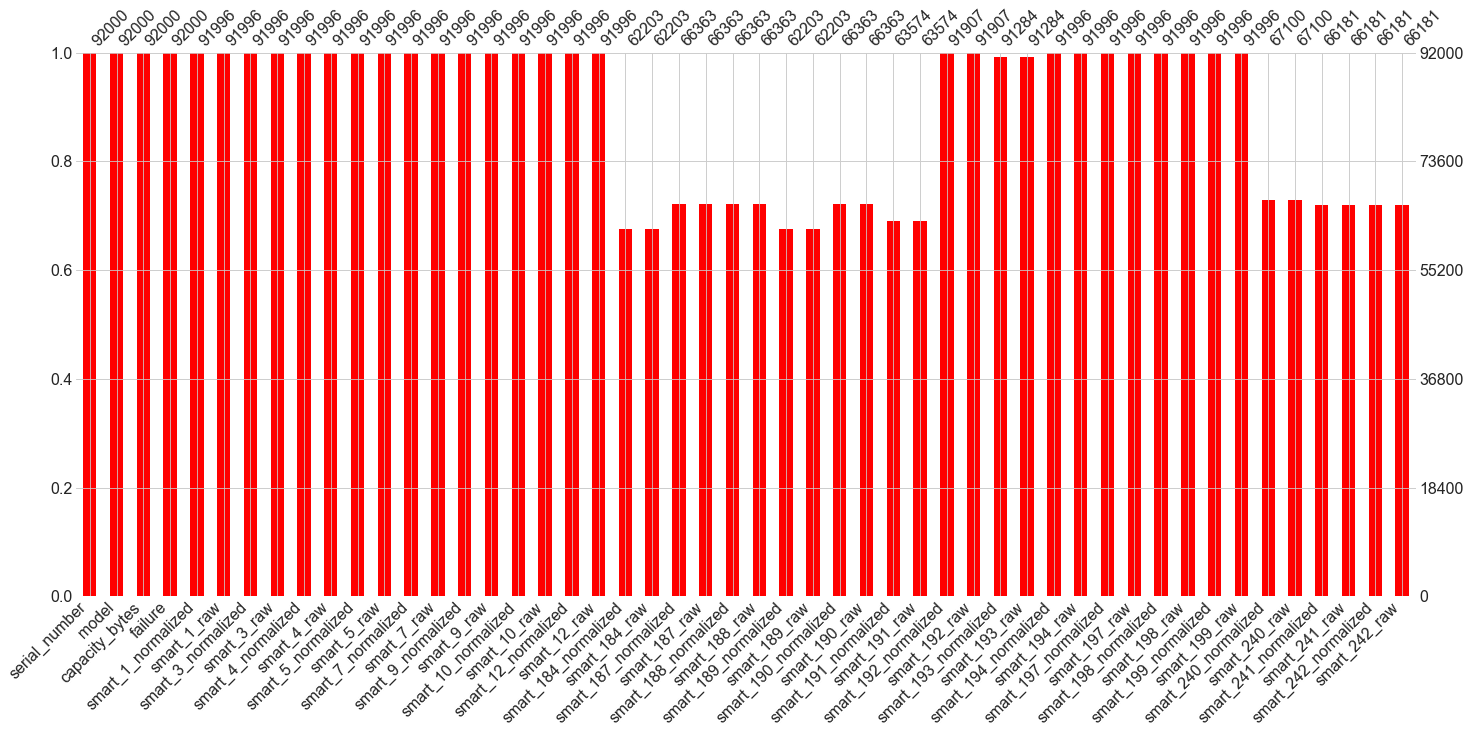

In [9]:
# Plotting fields with missing data.
msn.bar(data, color='red')
plt.grid()

In [10]:
# Filling in the missing data
data = data.fillna(method='backfill')

Do we still have any missing values in our data?

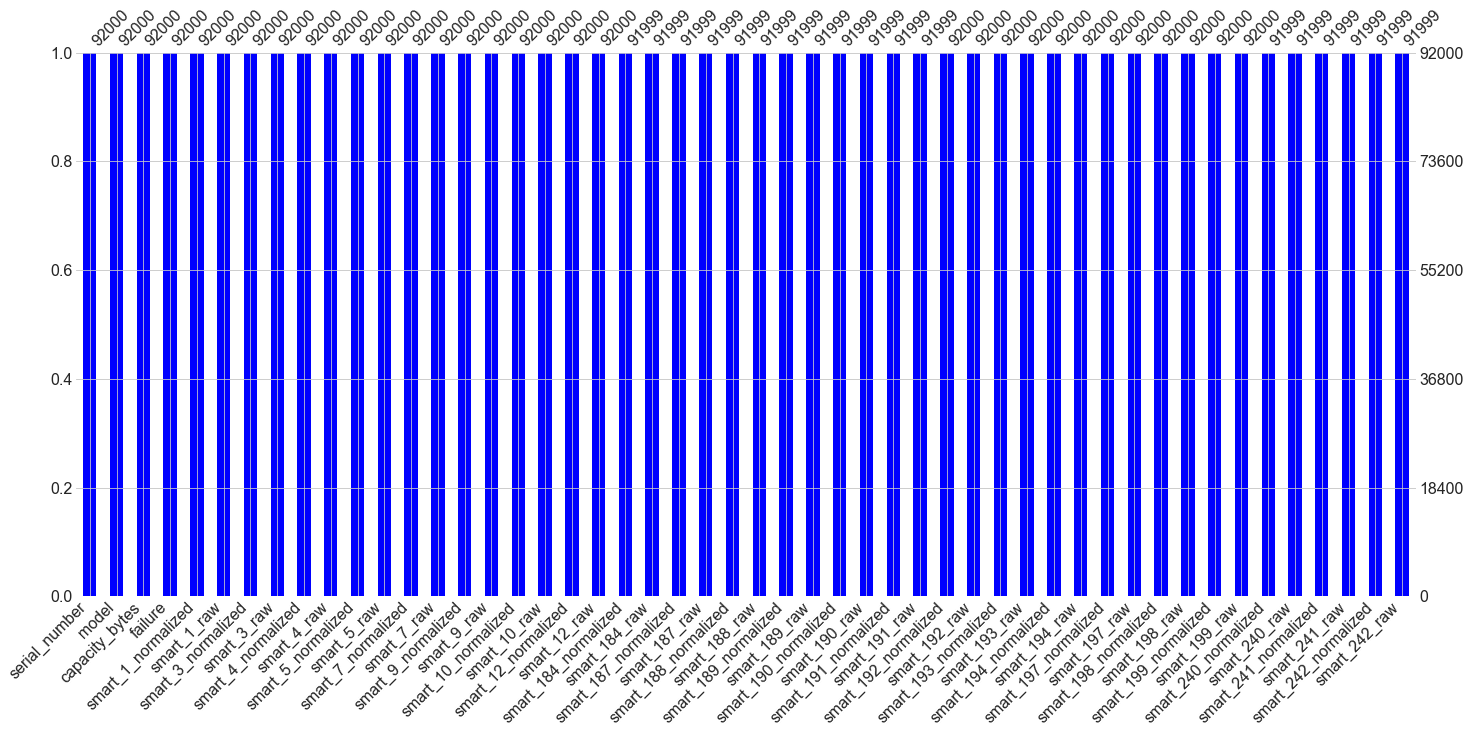

In [11]:
msn.bar(data, color='blue')
plt.grid()

No more missing data! No we'll have a look at our data.

#### Distribution of Drives by Model:

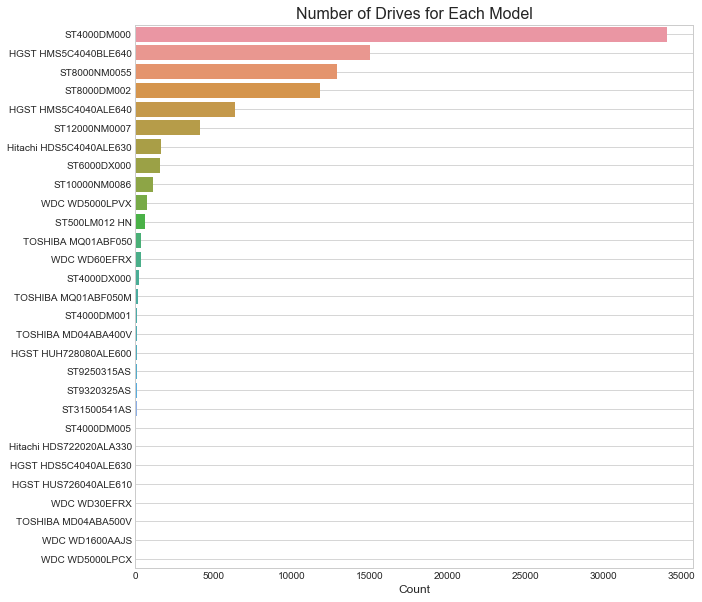

In [12]:
plt.figure(figsize=(10, 10))
plt.title('Number of Drives for Each Model', fontsize=16)
sns.countplot(data=data, y='model', order=data['model'].value_counts().index)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.grid()

The most common hard drive models are:
>1. `ST4000DM000`
>2. `HGST HMS5C4040BLE640`
>3. `ST8000NM0055`
>4. `ST8000DM002`
>5. `HGST HMS5C4040ALE640`

Let's make violin plots to compare the distribution of failure.

#### Time Series Analysis

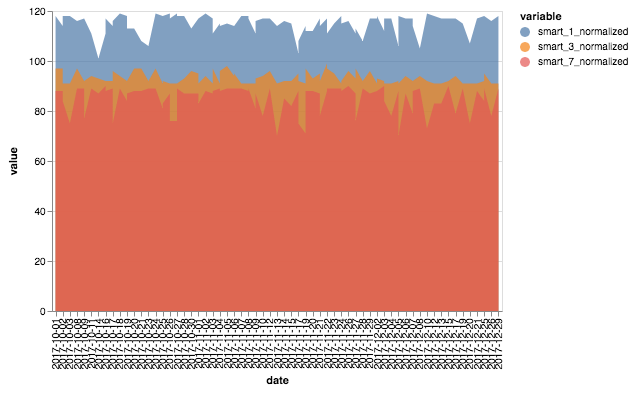

In [15]:
a = data.loc[(data['model'] == 'ST4000DM000')]
#del a['capacity_bytes']
a[['smart_1_normalized', 'smart_3_normalized', 'smart_7_normalized']].sample(100).vgplot.area(stacked=False)

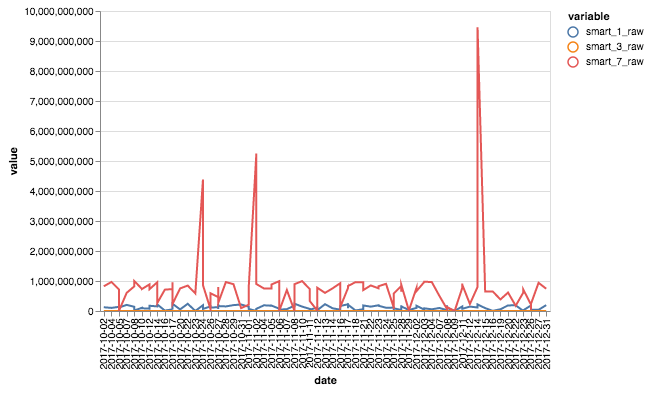

In [14]:
a[['smart_1_raw', 'smart_3_raw', 'smart_7_raw']].sample(100).vgplot.line()

>- `Smart 1: Raw_Read_Error_Rate (Raw Value)`
>- `Smart 1: Raw_Read_Error_Rate (Normalized Value)`

>- `Smart 3: Spin_Up_Time (Raw Value)`
>- `Smart 3: Spin_Up_Time (Normalized Value)`

>- `Smart 7: Seek_Error_Rate (Raw Value)`
>- `Smart 7: Seek_Error_Rate (Normalized Value)`

In [30]:
data.model.unique()

array(['ST4000DM000', 'HGST HMS5C4040ALE640', 'ST8000NM0055',
       'HGST HMS5C4040BLE640', 'ST8000DM002', 'Hitachi HDS5C4040ALE630',
       'ST6000DX000', 'WDC WD5000LPVX', 'TOSHIBA MQ01ABF050',
       'ST4000DX000', 'ST10000NM0086', 'ST12000NM0007', 'WDC WD60EFRX',
       'HGST HUH728080ALE600', 'ST500LM012 HN', 'ST4000DM001',
       'TOSHIBA MQ01ABF050M', 'ST9250315AS', 'TOSHIBA MD04ABA400V',
       'ST9320325AS', 'ST31500541AS', 'HGST HUS726040ALE610',
       'WDC WD1600AAJS', 'HGST HDS5C4040ALE630', 'ST4000DM005',
       'Hitachi HDS722020ALA330', 'WDC WD5000LPCX', 'WDC WD30EFRX',
       'TOSHIBA MD04ABA500V'], dtype=object)